In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
sns.set_style("whitegrid")
np.random.seed(42)

# Генерация данных: длительность сессии (минуты)
sample_size = 7000
baseline = np.random.normal(120, 45, sample_size)
treatment = np.random.normal(124, 48, sample_size)

# Сбор в датасет
data = pd.DataFrame({
    'version': ['Baseline'] * sample_size + ['Treatment'] * sample_size,
    'session_duration': np.concatenate([baseline, treatment])
})

data.head()

,version,session_duration
0,Baseline,142.352137
1,Baseline,113.778106
2,Baseline,149.145984
3,Baseline,188.536344
4,Baseline,109.463098


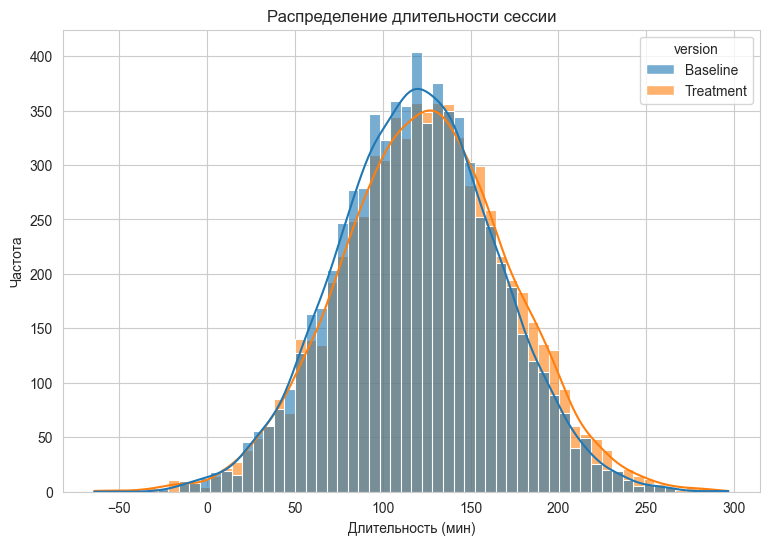

In [4]:
data.groupby('version')['session_duration'].agg(['mean', 'std', 'min', 'max']).T

plt.figure(figsize=(9, 6))
sns.histplot(data, x='session_duration', hue='version', kde=True, bins=60, alpha=0.6)
plt.title('Распределение длительности сессии')
plt.xlabel('Длительность (мин)')
plt.ylabel('Частота')
plt.show()

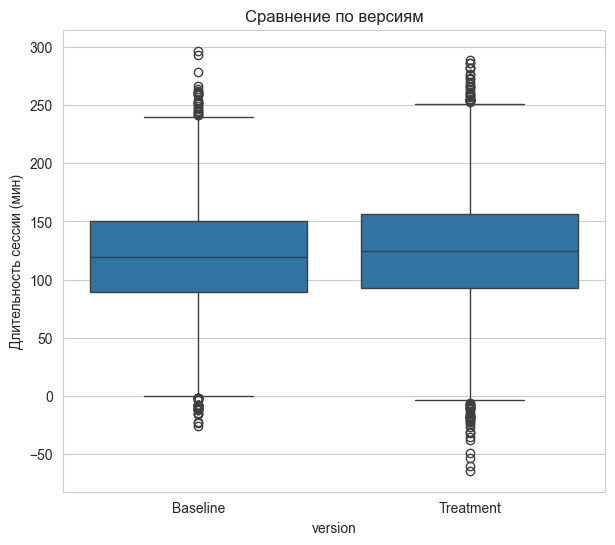

In [5]:
plt.figure(figsize=(7, 6))
sns.boxplot(x='version', y='session_duration', data=data)
plt.title('Сравнение по версиям')
plt.ylabel('Длительность сессии (мин)')
plt.show()

In [6]:
# Тест Левена — проверка равенства дисперсий
levene_result = stats.levene(
    data[data['version'] == 'Baseline']['session_duration'],
    data[data['version'] == 'Treatment']['session_duration']
)

# Тест нормальности для подвыборок
shapiro_base = stats.shapiro(
    data[data['version'] == 'Baseline']['session_duration'].sample(500)
)
shapiro_treat = stats.shapiro(
    data[data['version'] == 'Treatment']['session_duration'].sample(500)
)

levene_result, shapiro_base, shapiro_treat


(LeveneResult(statistic=np.float64(22.270547476941413), pvalue=np.float64(2.391026884892942e-06)),
 ShapiroResult(statistic=np.float64(0.9935690797796859), pvalue=np.float64(0.031805291903773195)),
 ShapiroResult(statistic=np.float64(0.9976668763516582), pvalue=np.float64(0.7198445150662651)))

In [7]:

# T-тест (с коррекцией на неравные дисперсии)
t_stat, p_val = stats.ttest_ind(
    data[data['version'] == 'Baseline']['session_duration'],
    data[data['version'] == 'Treatment']['session_duration'],
    equal_var=False
)

# Непараметрический тест
mw_stat, mw_p = stats.mannwhitneyu(
    data[data['version'] == 'Baseline']['session_duration'],
    data[data['version'] == 'Treatment']['session_duration'],
    alternative='two-sided'
)

t_stat, p_val, mw_stat, mw_p

(np.float64(-5.87206620045661),
 np.float64(4.4019226212228055e-09),
 np.float64(23096428.0),
 np.float64(4.354579190696693e-09))

In [8]:
# Conversion Rate Analysis Component
conversion_baseline = np.random.binomial(1, 0.10, sample_size)
conversion_treatment = np.random.binomial(1, 0.115, sample_size)

conversion_data = pd.DataFrame({
    'version': ['Baseline'] * sample_size + ['Treatment'] * sample_size,
    'conversion_event': np.concatenate([conversion_baseline, conversion_treatment])
})

conversion_rates = conversion_data.groupby('version')['conversion_event'].agg(['mean', 'sum', 'count'])
print("Conversion Summary:")
print(conversion_rates)

Conversion Summary:
               mean  sum  count
version                        
Baseline   0.097571  683   7000
Treatment  0.120714  845   7000


In [ ]:
# Z-test
p_base = conversion_data[conversion_data['version']=='Baseline']['conversion_event'].mean()
p_treat = conversion_data[conversion_data['version']=='Treatment']['conversion_event'].mean()
n_base = n_treat = sample_size
p_combined = (p_base*n_base + p_treat*n_treat) / (n_base + n_treat)
se_pooled = np.sqrt(p_combined*(1-p_combined)*(1/n_base + 1/n_treat))
z_score = (p_treat - p_base) / se_pooled
p_val_z = 2*(1 - stats.norm.cdf(abs(z_score)))

In [10]:
final_results = {
    'Baseline Duration Mean': round(data[data['version']=='Baseline']['session_duration'].mean(),2),
    'Treatment Duration Mean': round(data[data['version']=='Treatment']['session_duration'].mean(),2),
    'T-test P-value': round(p_val, 4),
    'Mann-Whitney P-value': round(mw_p, 4),
    'Cohen\'s d': round((p_treat - p_base) / np.sqrt(((n_base-1)*np.var(conversion_baseline) + (n_treat-1)*np.var(conversion_treatment))/(n_base+n_treat-2)), 3),
    'Baseline Conversion Rate': round(p_base,4),
    'Treatment Conversion Rate': round(p_treat,4),
    'Z-test P-value': round(p_val_z, 4)
}
final_results

{'Baseline Duration Mean': np.float64(119.7),
 'Treatment Duration Mean': np.float64(124.32),
 'T-test P-value': np.float64(0.0),
 'Mann-Whitney P-value': np.float64(0.0),
 "Cohen's d": np.float64(0.074),
 'Baseline Conversion Rate': np.float64(0.0976),
 'Treatment Conversion Rate': np.float64(0.1207),
 'Z-test P-value': np.float64(0.0)}